In [1]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
from test_train_data import x_train, x_test, y_train, y_test
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [3]:
# train a classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
clf.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, random_state=0)

In [4]:
# predict
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9087485515643106


In [5]:
# find accuracy, precision, recall, f1 score, jaccard index, kappa score, confusion matrix, ROC curve, AUC score, etc.

# precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)

# recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)

# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)

# jaccard index
from sklearn.metrics import jaccard_score
jaccard = jaccard_score(y_test, y_pred, average='macro')
print('Jaccard score: %f' % jaccard)

# kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

# confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr, tpr, thresholds)

# AUC score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC=%.3f' % (auc))

Precision: 0.911122
Recall: 0.854160
F1 score: 0.877039
Jaccard score: 0.786530
Cohens kappa: 0.755047
[[2445   64]
 [ 251  692]]
[0.         0.02550817 1.        ] [0.         0.73382821 1.        ] [2 1 0]
ROC AUC=0.854


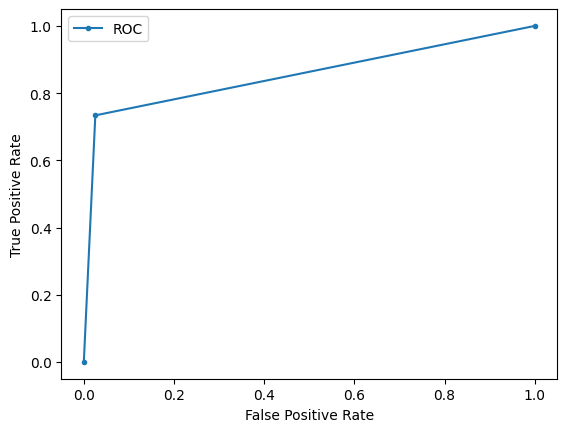

In [6]:

# roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# mflops for above model

